In [26]:
%run ../src/apriori-lib.py
%run ../src/apriori-testing-v8.py

In [28]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import json 

from random import sample 
import matplotlib.pyplot as plt

In [2]:
# order_p1 = pd.read_csv('../data/order_p1.csv', parse_dates=[1,11], infer_datetime_format=True)
orderproducts = pd.read_csv('../data-processed/orders_p1.csv')
orderproducts

,id,created_at,closed_at,processed_at,total_price,financial_status,fulfillment_status,refunds,discount_applications,customer.id,customer.created_at,customer.country,line_items.title,line_items.quantity,line_items.sku,line_items.grams,line_items.price,line_items.total_discount,line_items.fulfillment_status,line_items.discount_allocations
0,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],[],1.494266e+11,2018-01-01T17:23:26-08:00,United States,Vertigo™ Semi-Hollow,1,M80-VHB-BLK,20412,249.99,0.00,fulfilled,[]
1,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],[],1.494266e+11,2018-01-01T17:23:26-08:00,United States,The Tick™ 2.0 Black,1,M80-TICK-V2-BLK,3175,89.99,0.00,fulfilled,[]
2,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],[],1.494266e+11,2018-01-01T17:23:26-08:00,United States,Pedalboard Lite (Silver),1,PFX-PB-LT-SLV,912,109.99,0.00,fulfilled,[]
3,20556,2018-01-02 10:56:19+00:00,2018-01-02T18:02:32.000Z,2018-01-02T10:56:19.000Z,249.99,paid,fulfilled,[],[],1.503216e+11,2018-01-02T10:55:03-08:00,United States,Vertigo™ Semi-Hollow,1,M80-VHB-BLK,20412,249.99,0.00,fulfilled,[]
4,20554,2018-01-02 11:45:26+00:00,2018-01-02T18:02:33.000Z,2018-01-02T11:45:26.000Z,NaN,paid,fulfilled,[],"[{""type"":""manual"",""value"":""229.99"",""value_type...",1.503838e+11,2018-01-02T11:45:05-08:00,United States,The FlyBy,1,EFX-FLY-BLK,7257,229.99,229.99,fulfilled,"[{'amount': '229.99', 'discount_application_in..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7689,400417,2021-04-02 06:03:06+00:00,2021-04-02T17:02:31.000Z,2021-04-02T06:03:05.000Z,269.99,paid,fulfilled,[],[],1.122758e+12,2019-02-04T14:20:00-08:00,United States,"Pedalboard Large, Black and Pro Accessory Case...",1,PFX-PB-L-BLK-BDL,0,269.99,0.00,fulfilled,[]
7690,400436,2021-04-02 07:16:47+00:00,2021-04-02T17:02:33.000Z,2021-04-02T07:16:46.000Z,219.48,paid,fulfilled,[],[],6.553521e+09,2017-08-02T12:42:03-07:00,United States,"Classic Tick Accessory Case 2.0, Black",1,M80-TICK-V2-BLK,3175,89.99,0.00,fulfilled,[]
7691,400436,2021-04-02 07:16:47+00:00,2021-04-02T17:02:33.000Z,2021-04-02T07:16:46.000Z,219.48,paid,fulfilled,[],[],6.553521e+09,2017-08-02T12:42:03-07:00,United States,"Pedalboard Lite, Black",1,PFX-PB-LT-BLK,912,109.99,0.00,fulfilled,[]
7692,400451,2021-04-02 09:39:12+00:00,2021-04-02T17:02:34.000Z,2021-04-02T09:39:11.000Z,329.99,paid,fulfilled,[],[],5.074619e+12,2021-04-02T10:37:55-07:00,United States,"Classic Dual Electric Guitar Case, Black",1,M80-2G-BLK,20412,329.99,0.00,fulfilled,[]


In [3]:
orderproducts['discount_applications'] = orderproducts['discount_applications'].apply(lambda x: "yes" if len(json.loads(x)) > 0 else "no")

orderproducts.rename(columns={
    'id': 'order_id', 
    'created_at': 'order_created_at',
    'total_price': 'order_total_price',
    'fulfillment_status': 'order_status',
    'discount_applications': 'order_discounts',
    # '?????': 'product_title',
    'line_items.sku': 'product_sku',
    'line_items.quantity': 'product_quantity',
    'line_items.total_discount': 'product_discount',
    # '?????': 'product_category',
    # '?????': 'product_deparments', # => not in use
    # '?????': 'product_created_at', # => not in use
    'customer.id': 'customer_id',
    'customer.country': 'customer_country',
    'customer.created_at': 'customer_created_at',
}, inplace=True)
orderproducts

,order_id,order_created_at,closed_at,processed_at,order_total_price,financial_status,order_status,refunds,order_discounts,customer_id,customer_created_at,customer_country,line_items.title,product_quantity,product_sku,line_items.grams,line_items.price,product_discount,line_items.fulfillment_status,line_items.discount_allocations
0,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,2018-01-01T17:23:26-08:00,United States,Vertigo™ Semi-Hollow,1,M80-VHB-BLK,20412,249.99,0.00,fulfilled,[]
1,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,2018-01-01T17:23:26-08:00,United States,The Tick™ 2.0 Black,1,M80-TICK-V2-BLK,3175,89.99,0.00,fulfilled,[]
2,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,2018-01-01T17:23:26-08:00,United States,Pedalboard Lite (Silver),1,PFX-PB-LT-SLV,912,109.99,0.00,fulfilled,[]
3,20556,2018-01-02 10:56:19+00:00,2018-01-02T18:02:32.000Z,2018-01-02T10:56:19.000Z,249.99,paid,fulfilled,[],no,1.503216e+11,2018-01-02T10:55:03-08:00,United States,Vertigo™ Semi-Hollow,1,M80-VHB-BLK,20412,249.99,0.00,fulfilled,[]
4,20554,2018-01-02 11:45:26+00:00,2018-01-02T18:02:33.000Z,2018-01-02T11:45:26.000Z,NaN,paid,fulfilled,[],yes,1.503838e+11,2018-01-02T11:45:05-08:00,United States,The FlyBy,1,EFX-FLY-BLK,7257,229.99,229.99,fulfilled,"[{'amount': '229.99', 'discount_application_in..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7689,400417,2021-04-02 06:03:06+00:00,2021-04-02T17:02:31.000Z,2021-04-02T06:03:05.000Z,269.99,paid,fulfilled,[],no,1.122758e+12,2019-02-04T14:20:00-08:00,United States,"Pedalboard Large, Black and Pro Accessory Case...",1,PFX-PB-L-BLK-BDL,0,269.99,0.00,fulfilled,[]
7690,400436,2021-04-02 07:16:47+00:00,2021-04-02T17:02:33.000Z,2021-04-02T07:16:46.000Z,219.48,paid,fulfilled,[],no,6.553521e+09,2017-08-02T12:42:03-07:00,United States,"Classic Tick Accessory Case 2.0, Black",1,M80-TICK-V2-BLK,3175,89.99,0.00,fulfilled,[]
7691,400436,2021-04-02 07:16:47+00:00,2021-04-02T17:02:33.000Z,2021-04-02T07:16:46.000Z,219.48,paid,fulfilled,[],no,6.553521e+09,2017-08-02T12:42:03-07:00,United States,"Pedalboard Lite, Black",1,PFX-PB-LT-BLK,912,109.99,0.00,fulfilled,[]
7692,400451,2021-04-02 09:39:12+00:00,2021-04-02T17:02:34.000Z,2021-04-02T09:39:11.000Z,329.99,paid,fulfilled,[],no,5.074619e+12,2021-04-02T10:37:55-07:00,United States,"Classic Dual Electric Guitar Case, Black",1,M80-2G-BLK,20412,329.99,0.00,fulfilled,[]


In [4]:
# Create date field, remove time details
# orderproducts['order_date'] = [x.date() for x in orderproducts['order_created_at']]  # remove time, display only date
orderproducts['order_date'] = orderproducts['order_created_at'].apply(lambda x: pd.to_datetime((pd.to_datetime(x).date())))# remove time, display only date
# orderproducts['order_date'] = pd.to_datetime(orderproducts['order_date'])
orderproducts

,order_id,order_created_at,closed_at,processed_at,order_total_price,financial_status,order_status,refunds,order_discounts,customer_id,...,customer_country,line_items.title,product_quantity,product_sku,line_items.grams,line_items.price,product_discount,line_items.fulfillment_status,line_items.discount_allocations,order_date
0,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,...,United States,Vertigo™ Semi-Hollow,1,M80-VHB-BLK,20412,249.99,0.00,fulfilled,[],2018-01-01
1,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,...,United States,The Tick™ 2.0 Black,1,M80-TICK-V2-BLK,3175,89.99,0.00,fulfilled,[],2018-01-01
2,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,...,United States,Pedalboard Lite (Silver),1,PFX-PB-LT-SLV,912,109.99,0.00,fulfilled,[],2018-01-01
3,20556,2018-01-02 10:56:19+00:00,2018-01-02T18:02:32.000Z,2018-01-02T10:56:19.000Z,249.99,paid,fulfilled,[],no,1.503216e+11,...,United States,Vertigo™ Semi-Hollow,1,M80-VHB-BLK,20412,249.99,0.00,fulfilled,[],2018-01-02
4,20554,2018-01-02 11:45:26+00:00,2018-01-02T18:02:33.000Z,2018-01-02T11:45:26.000Z,NaN,paid,fulfilled,[],yes,1.503838e+11,...,United States,The FlyBy,1,EFX-FLY-BLK,7257,229.99,229.99,fulfilled,"[{'amount': '229.99', 'discount_application_in...",2018-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7689,400417,2021-04-02 06:03:06+00:00,2021-04-02T17:02:31.000Z,2021-04-02T06:03:05.000Z,269.99,paid,fulfilled,[],no,1.122758e+12,...,United States,"Pedalboard Large, Black and Pro Accessory Case...",1,PFX-PB-L-BLK-BDL,0,269.99,0.00,fulfilled,[],2021-04-02
7690,400436,2021-04-02 07:16:47+00:00,2021-04-02T17:02:33.000Z,2021-04-02T07:16:46.000Z,219.48,paid,fulfilled,[],no,6.553521e+09,...,United States,"Classic Tick Accessory Case 2.0, Black",1,M80-TICK-V2-BLK,3175,89.99,0.00,fulfilled,[],2021-04-02
7691,400436,2021-04-02 07:16:47+00:00,2021-04-02T17:02:33.000Z,2021-04-02T07:16:46.000Z,219.48,paid,fulfilled,[],no,6.553521e+09,...,United States,"Pedalboard Lite, Black",1,PFX-PB-LT-BLK,912,109.99,0.00,fulfilled,[],2021-04-02
7692,400451,2021-04-02 09:39:12+00:00,2021-04-02T17:02:34.000Z,2021-04-02T09:39:11.000Z,329.99,paid,fulfilled,[],no,5.074619e+12,...,United States,"Classic Dual Electric Guitar Case, Black",1,M80-2G-BLK,20412,329.99,0.00,fulfilled,[],2021-04-02


In [5]:
# read products information
products = pd.read_csv('../data-raw/products.csv')
# remove duplicated sku names
products = products.drop_duplicates(subset = ['sku'], keep='first')
products = products.set_index('sku')
products

,id,title,price_usd,category,tags,created_at
sku,,,,,,
M80-AD-BLK,33184,"MONO Classic Acoustic/Dreadnought Guitar Case,...",229.99,Acoustic Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
M80-VEG-BLK,33186,"MONO Vertigo Electric Guitar Case, Black",249.99,Electric Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
M80-EG-BLK,33187,"MONO Classic Electric Guitar Case, Black",229.99,Electric Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
M80-VEG-GRY,34589,"MONO Vertigo Electric Guitar Case, Grey",249.99,Electric Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
M80-VEB-BLK,34590,"MONO Vertigo Bass Guitar Case, Black",249.99,Bass Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
...,...,...,...,...,...,...
PFX-PBC-L-SLV-BDL,2667170,MONO Pedalboard Carbon Large and Pro Accessory...,499.99,Pedalboards,"Cases & Gig Bags,Pedals & Pedalboards",2020-01-14T18:48:13.000Z
PFX-PBC-M-SLV-BDL,2667171,MONO Pedalboard Carbon Medium and Tour Accesso...,399.99,Pedalboards,"Cases & Gig Bags,Pedals & Pedalboards",2020-01-14T18:48:13.000Z
PFX-PBC-S-SLV-BDL,2667172,MONO Pedalboard Carbon Small and Club Accessor...,299.99,Pedalboards,"Cases & Gig Bags,Pedals & Pedalboards",2020-01-14T18:48:13.000Z


In [6]:
# Extract the product price for individual item in the list
orderproducts['product_price'] = orderproducts['product_sku'].apply(lambda x: products['price_usd'][x] if x in products.index else 0)
orderproducts['product_title'] = orderproducts['product_sku'].apply(lambda x: products['title'][x] if x in products.index else np.NaN)
orderproducts['product_category'] = orderproducts['product_sku'].apply(lambda x: products['category'][x] if x in products.index else np.NaN)
orderproducts['product_tags'] = orderproducts['product_sku'].apply(lambda x: products['tags'][x] if x in products.index else np.NaN)
orderproducts

,order_id,order_created_at,closed_at,processed_at,order_total_price,financial_status,order_status,refunds,order_discounts,customer_id,...,line_items.grams,line_items.price,product_discount,line_items.fulfillment_status,line_items.discount_allocations,order_date,product_price,product_title,product_category,product_tags
0,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,...,20412,249.99,0.00,fulfilled,[],2018-01-01,249.99,"MONO Vertigo Semi-Hollow Guitar Case, Black",Electric Guitar Cases & Gig Bags,Cases & Gig Bags
1,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,...,3175,89.99,0.00,fulfilled,[],2018-01-01,89.99,"MONO Classic Tick Accessory Case 2.0, Black",Pedals & Pedalboards Cases & Gig Bags,Cases & Gig Bags
2,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,...,912,109.99,0.00,fulfilled,[],2018-01-01,109.99,"MONO Pedalboard Lite, Silver",Pedalboards,Pedals & Pedalboards
3,20556,2018-01-02 10:56:19+00:00,2018-01-02T18:02:32.000Z,2018-01-02T10:56:19.000Z,249.99,paid,fulfilled,[],no,1.503216e+11,...,20412,249.99,0.00,fulfilled,[],2018-01-02,249.99,"MONO Vertigo Semi-Hollow Guitar Case, Black",Electric Guitar Cases & Gig Bags,Cases & Gig Bags
4,20554,2018-01-02 11:45:26+00:00,2018-01-02T18:02:33.000Z,2018-01-02T11:45:26.000Z,NaN,paid,fulfilled,[],yes,1.503838e+11,...,7257,229.99,229.99,fulfilled,"[{'amount': '229.99', 'discount_application_in...",2018-01-02,229.99,"MONO Classic FlyBy Backpack, Black",DJ Equipment Cases & Gig Bags,Cases & Gig Bags
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7689,400417,2021-04-02 06:03:06+00:00,2021-04-02T17:02:31.000Z,2021-04-02T06:03:05.000Z,269.99,paid,fulfilled,[],no,1.122758e+12,...,0,269.99,0.00,fulfilled,[],2021-04-02,269.99,"MONO Pedalboard Large, Black and Pro Accessory...",Pedalboards,"Cases & Gig Bags,Pedals & Pedalboards"
7690,400436,2021-04-02 07:16:47+00:00,2021-04-02T17:02:33.000Z,2021-04-02T07:16:46.000Z,219.48,paid,fulfilled,[],no,6.553521e+09,...,3175,89.99,0.00,fulfilled,[],2021-04-02,89.99,"MONO Classic Tick Accessory Case 2.0, Black",Pedals & Pedalboards Cases & Gig Bags,Cases & Gig Bags
7691,400436,2021-04-02 07:16:47+00:00,2021-04-02T17:02:33.000Z,2021-04-02T07:16:46.000Z,219.48,paid,fulfilled,[],no,6.553521e+09,...,912,109.99,0.00,fulfilled,[],2021-04-02,109.99,"MONO Pedalboard Lite, Black",Pedalboards,Pedals & Pedalboards
7692,400451,2021-04-02 09:39:12+00:00,2021-04-02T17:02:34.000Z,2021-04-02T09:39:11.000Z,329.99,paid,fulfilled,[],no,5.074619e+12,...,20412,329.99,0.00,fulfilled,[],2021-04-02,329.99,"MONO Classic Dual Electric Guitar Case, Black",Electric Guitar Cases & Gig Bags,Cases & Gig Bags


In [7]:
# list of product skus that is not listed in products.csv
emp = [x for x in orderproducts['product_sku'] if x not in products.index]
print(set(emp))

{nan, 'CPN-BAG-STRAP-DPS-BLK', 'STICKER', 'B-M80-AC-BLK', 'B-M80-SAD-BLK', '50-K61-FOAM', 'B-M80-VEG-GRY', 'SRB-L-BLK', 'B-M80-EB-BLK'}


In [8]:
orderproducts = orderproducts[['order_id', 'order_date', 'order_total_price', 'product_price', 'order_discounts',
                               'product_discount', 'order_status', 'product_title', 'product_sku', 'product_quantity',
                               'product_category']]

In [10]:
def df_get_top_list (df, top, filtered_df=None, info=True, agg_field='product_quantity', id_field='product_sku', time_field='order_date'):
    filtered_df = df if filtered_df is None else filtered_df
    df_index_field_n_aggregate_field = filtered_df.groupby([id_field])[agg_field].agg(['sum']).sort_values('sum', ascending=False).reset_index()
    if info:
        print(df_index_field_n_aggregate_field.head())
    top_data = list(df_index_field_n_aggregate_field[id_field].values)[0:top]
    return top_data

def df_get_top(df, top, filtered_df=None, info=True, agg_field='product_quantity', id_field='product_sku', time_field='order_date'):
    top_data = df_get_top_list(df, top, filtered_df, info, agg_field, id_field, time_field)
    new_df = df[df[id_field].isin(top_data)]

    new_df.set_index(time_field, inplace=True)
    df_monthly = pd.crosstab(new_df.index, new_df[id_field]).resample('M').sum()
    x_labels = list(df_monthly.index.strftime('%Y-%m').values)
    
    if info:
        plt.figure(figsize=(15,10))
        for prod in list(df_monthly.columns):
            plt.plot(x_labels, df_monthly[prod], label=prod)
        plt.title('Sales of individual ' + id_field + ' from 2018 - 2020')
        plt.xticks(np.arange(len(x_labels)),x_labels, rotation=90)
        plt.legend(loc='upper right')
        plt.show()
    return new_df

In [21]:
product_skues = orderproducts.groupby(['product_sku'])['order_date'].apply(list)
product_skues

product_sku
50-K61-FOAM                                  [2018-10-13 00:00:00]
B-M80-AC-BLK                                 [2018-07-04 00:00:00]
B-M80-EB-BLK            [2018-04-13 00:00:00, 2018-02-11 00:00:00]
B-M80-SAD-BLK                                [2018-04-13 00:00:00]
B-M80-VEG-GRY                                [2018-05-31 00:00:00]
                                       ...                        
TEAR-AID         [2018-01-18 00:00:00, 2018-01-21 00:00:00, 201...
TEX-BLK                                      [2018-01-03 00:00:00]
WCS-L-BLK        [2018-08-12 00:00:00, 2018-12-17 00:00:00, 201...
WCS-M-BLK        [2018-02-04 00:00:00, 2018-02-09 00:00:00, 201...
ZP1-L-BLK                                    [2018-06-12 00:00:00]
Name: order_date, Length: 118, dtype: object

In [23]:
min_item_in_baskets = 3
indexes = list(product_skues.index)
for i in indexes:    
    if (len(product_skues[i]) < min_item_in_baskets):
        product_skues = product_skues.drop(labels=i)
product_skues

product_sku
CPN-BAG-STRAP-DPS-BLK    [2018-02-05 00:00:00, 2018-05-20 00:00:00, 201...
CVL-DCW-ASH              [2018-05-24 00:00:00, 2018-08-09 00:00:00, 201...
CVL-DCW-BLK              [2018-01-01 00:00:00, 2018-01-29 00:00:00, 201...
CVL-LLT-13-ASH           [2018-05-02 00:00:00, 2018-09-05 00:00:00, 201...
CVL-LLT-13-BLK           [2018-01-02 00:00:00, 2018-01-24 00:00:00, 201...
                                               ...                        
SRB-L-BLK                [2018-01-07 00:00:00, 2018-03-08 00:00:00, 201...
SRB-S-BLK                [2018-01-23 00:00:00, 2018-02-06 00:00:00, 201...
TEAR-AID                 [2018-01-18 00:00:00, 2018-01-21 00:00:00, 201...
WCS-L-BLK                [2018-08-12 00:00:00, 2018-12-17 00:00:00, 201...
WCS-M-BLK                [2018-02-04 00:00:00, 2018-02-09 00:00:00, 201...
Name: order_date, Length: 107, dtype: object

In [37]:
product_skues_len = product_skues.apply(lambda x: len(x))

<AxesSubplot:ylabel='Frequency'>

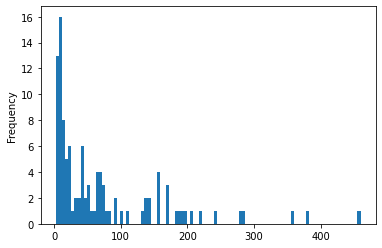

In [44]:
product_skues_len.plot.hist(bins=100, alpha=1)

<AxesSubplot:ylabel='Frequency'>

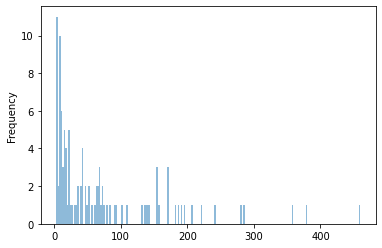

In [53]:
product_skues_len.plot.hist(bins=200, alpha=0.5)